<a href="https://colab.research.google.com/github/Jay2251929205/Jiayi-Wang-ECON317/blob/main/HW/ECON317_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:


import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from statistics import variance

# Problem6

In [2]:
t=1/252
i=0
M=0.08*t
sigmaM=0.16*np.sqrt(t)


In [3]:
alpha=np.random.normal(0.08*t, 0.01*t, 100)
beta=np.random.uniform(0,2,100)
sigmai=np.random.uniform(0.05,0.5,100)


In [6]:
R_M=np.random.normal(M,sigmaM,10000)
R_i=[alpha[j]+beta[j]*R_M+np.random.normal(0,sigmai[j],10000) for j in range(100)]

In [22]:
omega_hat= (1/9999)*np.dot(R_i, np.transpose(R_i))
sigmaM_hat=variance(R_M)
ybar=[np.mean(j) for j in R_i]
xbar=np.mean(R_M)
X=np.sum([(j-xbar)**2 for j in R_M])
beta_hat= [np.sum([R_M[k]-xbar * (R_i[j][k]-ybar[j]) for k in range(10000)])/X for j in range(100)]

In [23]:
omegaS_hat=np.zeros((100,100))
for j in range(100):
  for k in range(100):
    omegaS_hat[j][k]=beta_hat[j]*beta_hat[k]

[[ 6.90228904e-02 -1.93683777e-03 -9.68064045e-04 ... -2.12769092e-03
  -1.80811765e-03 -2.59213092e-03]
 [-1.93683777e-03  2.40186716e-01 -2.21958317e-04 ... -2.24121914e-03
  -1.55846600e-03 -2.41052114e-03]
 [-9.68064045e-04 -2.21958317e-04  1.51127343e-01 ... -1.57368822e-03
  -2.32509846e-03 -1.97872677e-03]
 ...
 [-2.12769092e-03 -2.24121914e-03 -1.57368822e-03 ...  1.28551181e-02
  -2.24352218e-03 -2.00962715e-03]
 [-1.80811765e-03 -1.55846600e-03 -2.32509846e-03 ... -2.24352218e-03
   1.19174984e-01 -2.57568187e-03]
 [-2.59213092e-03 -2.41052114e-03 -1.97872677e-03 ... -2.00962715e-03
  -2.57568187e-03  6.06117156e-02]]


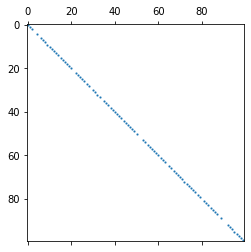

In [26]:
A = omega_hat-sigmaM_hat*omegaS_hat
print(A)
plt.spy(A, precision=0.01,markersize=1)
plt.show()

#Problem7



In [27]:
s1=np.sqrt((0.16**2)/252)
s2=np.sqrt((0.25**2)/252)
s3=np.sqrt((0.2**2)/252)
omega=[[s1**2,0.1*s1*s2, 0.2*s1*s3], [0.1*s1*s2, s2**2,0.3*s2*s3], [0.2*s1*s3, 0.3*s2*s3, s3**2]]


In [35]:
inv=np.linalg.inv(omega)
w=np.dot(inv, np.ones(3))/(np.dot(np.dot(np.ones((1,3)), inv), np.ones(3)))
var_T=1/(np.dot(np.dot(np.ones((1,3)),inv),np.ones(3)))

In [33]:
l=np.linalg.cholesky(omega)

var=[]
for i in range(1000):
  s=[np.dot(w, np.dot(l, np.random.normal(0,1,3))) for j in range(1000)]
  var.append(variance(s))
var.sort()

In [36]:
var[24], var[974],var_T[0]

(6.0850339098626134e-05, 7.328843106853267e-05, 6.676041451939487e-05)